## Predict Hospital Re-admission probability for diabetic patients
### Connecting to the repository

In [1]:
cd C:\Users\Shashwat Gupta\Desktop\Hospital Data\Github

C:\Users\Shashwat Gupta\Desktop\Hospital Data\Github


## Loading Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.metrics import recall_score
import openpyxl
%matplotlib inline

## Reading both train and test CSV files as data and final_test respectively

In [3]:
data  = pd.read_csv("training_data.csv")
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,N
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,N
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,N
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,N
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,N


In [4]:
final_test = pd.read_csv("test_data.csv")
final_test.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,No,Steady,No,No,No,No,No,Ch,Yes
1,62256,49726791,AfricanAmerican,Female,[60-70),?,3,1,2,1,...,No,No,Steady,No,No,No,No,No,No,Yes
2,150006,22864131,?,Female,[50-60),?,2,1,4,2,...,No,No,Down,No,No,No,No,No,Ch,Yes
3,183930,107400762,Caucasian,Female,[80-90),?,2,6,1,11,...,No,No,No,No,No,No,No,No,No,No
4,248916,115196778,Caucasian,Female,[50-60),?,1,1,1,2,...,No,No,Steady,No,No,No,No,No,No,Yes


### EDA ( Exploratory Data Analysis)¶
#### Data Insights of - training_data.csv
#### Data Structure

In [5]:
data.shape

(81414, 50)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81414 entries, 0 to 81413
Data columns (total 50 columns):
encounter_id                81414 non-null int64
patient_nbr                 81414 non-null int64
race                        81414 non-null object
gender                      81414 non-null object
age                         81414 non-null object
weight                      81414 non-null object
admission_type_id           81414 non-null int64
discharge_disposition_id    81414 non-null int64
admission_source_id         81414 non-null int64
time_in_hospital            81414 non-null int64
payer_code                  81414 non-null object
medical_specialty           81414 non-null object
num_lab_procedures          81414 non-null int64
num_procedures              81414 non-null int64
num_medications             81414 non-null int64
number_outpatient           81414 non-null int64
number_emergency            81414 non-null int64
number_inpatient            81414 non-null int64
dia

### Key Observations:
 * Number of rows: 81414
 * Number of columns: 50
 * Data Type: object and int
 * Null Values: '?' (No empty cell)

## Summary Statistics

In [7]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,8.141400e+04,8.141400e+04,81414.000000,81414.000000,81414.000000,81414.000000,81414.000000,81414.000000,81414.000000,81414.000000,81414.000000,81414.000000,81414.000000
mean,1.652012e+08,5.430959e+07,2.020918,3.709878,5.753777,4.398334,43.158535,1.338701,16.029110,0.365686,0.199437,0.635800,7.421807
std,1.025322e+08,3.869402e+07,1.445327,5.267986,4.052119,2.985424,19.679930,1.705755,8.122024,1.235754,0.964611,1.262974,1.933435
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.507868e+07,2.340358e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.524402e+08,4.553196e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.301472e+08,8.750457e+07,3.000000,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


### Key observations:
* No null values in integer columns
* There are outliers in almost every column and that might indicate a pattern in healthcare data
* There are 5 id's columns and that should indicate catagorical nature of those columns

### Data catagory counts and uniqueness

In [8]:
data.race.value_counts()

Caucasian          60842
AfricanAmerican    15413
?                   1813
Hispanic            1617
Other               1216
Asian                513
Name: race, dtype: int64

In [9]:
data.gender.value_counts()

Female             43752
Male               37660
Unknown/Invalid        2
Name: gender, dtype: int64

In [10]:
data.age.value_counts()

[70-80)     20890
[60-70)     18059
[80-90)     13800
[50-60)     13736
[40-50)      7708
[30-40)      3019
[90-100)     2216
[20-30)      1312
[10-20)       547
[0-10)        127
Name: age, dtype: int64

In [11]:
data.admission_type_id.value_counts()

1    43317
3    15023
2    14754
6     4221
5     3812
8      263
7       17
4        7
Name: admission_type_id, dtype: int64

In [12]:
data.discharge_disposition_id.value_counts()

1     48196
3     11172
6     10325
18     2937
2      1713
22     1618
11     1333
5       939
25      773
4       634
7       509
13      320
23      319
14      283
28      104
8        85
15       56
24       43
9        16
16       11
17       11
19        6
10        5
12        3
27        2
20        1
Name: discharge_disposition_id, dtype: int64

In [13]:
data.change.value_counts()

No    43758
Ch    37656
Name: change, dtype: int64

In [14]:
data.diabetesMed.value_counts()

Yes    62733
No     18681
Name: diabetesMed, dtype: int64

In [15]:
# Target Variable (IMBALANCED DATA)
data.readmitted.value_counts()

N    72328
Y     9086
Name: readmitted, dtype: int64

In [16]:
data.medical_specialty.unique()

array(['Pediatrics-Endocrinology', '?', 'Family/GeneralPractice',
       'Cardiology', 'InternalMedicine', 'Surgery-General', 'Orthopedics',
       'Gastroenterology', 'Orthopedics-Reconstructive', 'Nephrology',
       'Surgery-Cardiovascular/Thoracic', 'Psychiatry',
       'Emergency/Trauma', 'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Gynecology', 'Oncology',
       'Pediatrics-Neurology', 'Surgery-Plastic', 'Surgery-Thoracic',
       'Psychology', 'PhysicalMedicineandRehabilitation',
       'InfectiousDiseases', 'Podiatry', 'Anesthesiology',
       'Ophthalmology', 'Pediatrics-EmergencyMedicine',
       'Surgery-

In [17]:
data.diag_1.unique()

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '250.7',
       '157', '999', '410', '682', '402', '737', '572', '189', '786',
       '427', '277', '584', '462', '473', '411', '486', '998', '996',
       '511', '432', '626', '295', '250.6', '618', '182', '423', '808',
       '250.4', '722', '403', '250.11', '784', '707', '440', '151', '715',
       '997', '198', '564', '38', '590', '556', '578', '250.32', '433',
       'V58', '569', '185', '434', '536', '255', '250.13', '599', '558',
       '574', '491', '560', '244', '250.03', '730', '188', '824', '250.8',
       '332', '291', '562', '510', '401', '263', '70', '250.02', '493',
       '642', '625', '593', '807', '456', '446', '518', '250.41', '820',
       '515', '780', '250.22', 'V57', '577', '995', '235', '196', '721',
       '162', '724', '282', '514', 'V55', '250.33', '530', '466', '296',
       '435', '250.12', 'V53', '789', '566', '191', '733', '455', '711',
       '482', '575', '202', '553', '225', '154', '571', 

In [18]:
data.glipizide.unique()

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [19]:
data.repaglinide.unique()

array(['No', 'Up', 'Steady', 'Down'], dtype=object)

### Key Observations:¶
* Race has 1813 null records, but those values need not to be removed as some patients have not reported their race
* Gender has 2 Invalid/Unknown records and can be removed due to small number 
* Age have 10 catagories with maximum data above 50 year old
* Admission_type_id should signify the catagory under which patient has taken admission like emergengy, urgent care etc
* Discharge_diposition_id should signify the catagory under which patient discharged like expired, home discharged etc. ***we should remove the rows with expired patients as they won't come back
* Change should signify change in medication and high number of patients were not prescribed change in medication
* DiabetesMed should signify if medication is prescribed. Nearly 77.05 % patients were prescribed the medicine
* Readmitted is the target variable which gives if patients are admitted again or not. Class with patient not re-admitted comprise of 88.8 % of total data. This is a clear case of class imbalance and can be evaluated by taking accuracy as precesion/recall or using SMOTE( Synthetic Minority Oversampling technique) to balance the data
* Medical_speciality and diag_1 likely diag_2, diag_3 (should mean first diagnostic) have lots of catagorical data and should be removed
* there are 24 diabetes medication and indicates if it was steady, increased, decreased, or not recomended. We need to figure out important medicine that affect the diabetes

### Missing Values

In [20]:
for col in data.columns:
    if data[col].dtypes == object:
        print("Percentage of missing values in: ",col,round((data[col][data[col]=='?']).count()/len(data),3))

Percentage of missing values in:  race 0.022
Percentage of missing values in:  gender 0.0
Percentage of missing values in:  age 0.0
Percentage of missing values in:  weight 0.968
Percentage of missing values in:  payer_code 0.396
Percentage of missing values in:  medical_specialty 0.491
Percentage of missing values in:  diag_1 0.0
Percentage of missing values in:  diag_2 0.004
Percentage of missing values in:  diag_3 0.014
Percentage of missing values in:  max_glu_serum 0.0
Percentage of missing values in:  A1Cresult 0.0
Percentage of missing values in:  metformin 0.0
Percentage of missing values in:  repaglinide 0.0
Percentage of missing values in:  nateglinide 0.0
Percentage of missing values in:  chlorpropamide 0.0
Percentage of missing values in:  glimepiride 0.0
Percentage of missing values in:  acetohexamide 0.0
Percentage of missing values in:  glipizide 0.0
Percentage of missing values in:  glyburide 0.0
Percentage of missing values in:  tolbutamide 0.0
Percentage of missing va

### Key Observations:¶
* Features like race, weight, payer_code, medical_specialty, diag_2 and diag_3 have missing values
* Features like weight, payer_code, medical_specialty should be removed straight away as they have approximately 96%, 40% and 50% data missing.

## Visualizations

### Correlation plot

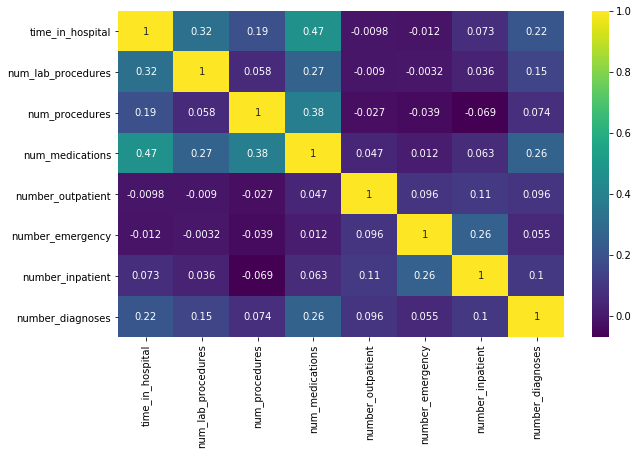

In [21]:
cp = data[['time_in_hospital', 'num_lab_procedures','num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cp, annot=True, cmap = 'viridis')

### Key Observations:
* These features are in no way correlated to each other and hence can be included in train data

### Bar Plots

Text(0, 0.5, 'count')

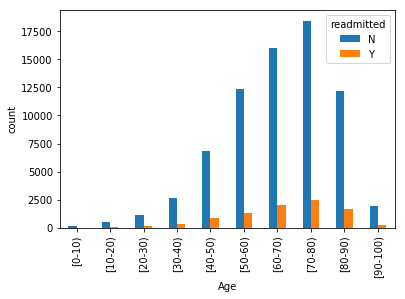

In [22]:
pd.crosstab(data.age,data.readmitted).plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('count')

Text(0, 0.5, 'count')

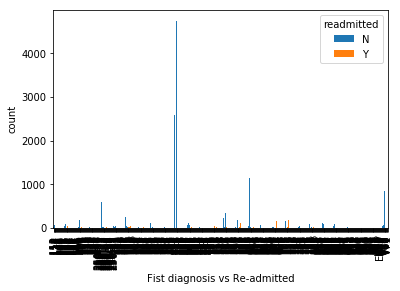

In [23]:
pd.crosstab(data.diag_1,data.readmitted).plot(kind='bar')
plt.xlabel('Fist diagnosis vs Re-admitted')
plt.ylabel('count')

Text(0, 0.5, 'count')

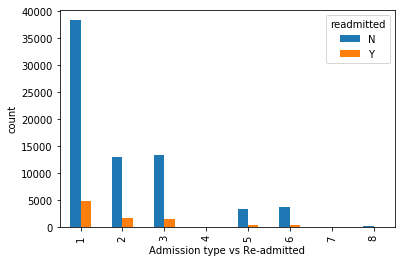

In [24]:
pd.crosstab(data.admission_type_id,data.readmitted).plot(kind='bar')
plt.xlabel('Admission type vs Re-admitted')
plt.ylabel('count')

Text(0, 0.5, 'count')

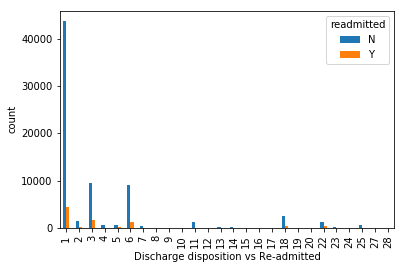

In [25]:
pd.crosstab(data.discharge_disposition_id,data.readmitted).plot(kind='bar')
plt.xlabel('Discharge disposition vs Re-admitted')
plt.ylabel('count')

Text(0, 0.5, 'count')

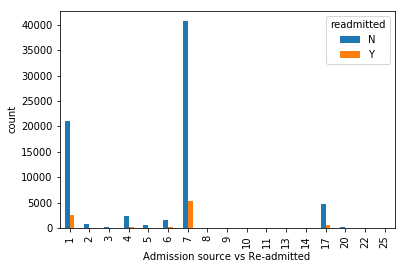

In [26]:
pd.crosstab(data.admission_source_id,data.readmitted).plot(kind='bar')
plt.xlabel('Admission source vs Re-admitted')
plt.ylabel('count')

Text(0, 0.5, 'count')

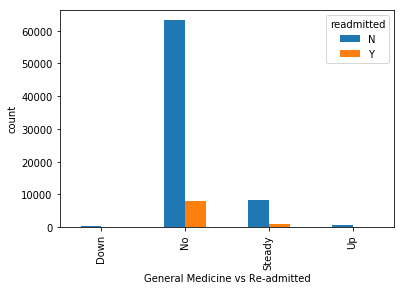

In [27]:
pd.crosstab(data.glipizide,data.readmitted).plot(kind='bar')
plt.xlabel('General Medicine vs Re-admitted')
plt.ylabel('count')

Text(0, 0.5, 'count')

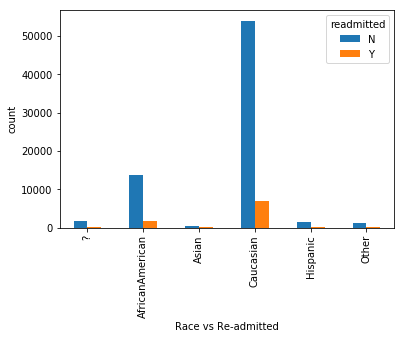

In [28]:
pd.crosstab(data.race,data.readmitted).plot(kind='bar')
plt.xlabel('Race vs Re-admitted')
plt.ylabel('count')

Text(0, 0.5, 'count')

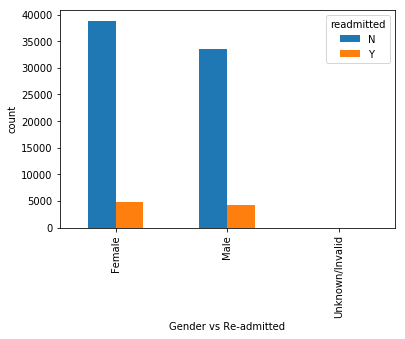

In [29]:
pd.crosstab(data.gender,data.readmitted).plot(kind='bar')
plt.xlabel('Gender vs Re-admitted')
plt.ylabel('count')

Text(0, 0.5, 'count')

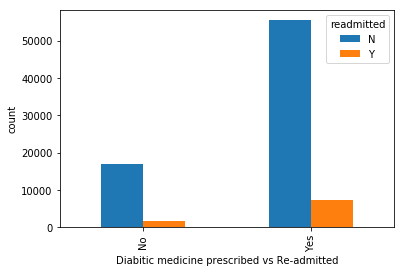

In [30]:
pd.crosstab(data.diabetesMed,data.readmitted).plot(kind='bar')
plt.xlabel('Diabitic medicine prescribed vs Re-admitted')
plt.ylabel('count')

### Key Observations:
* Features like diag_1 have so many catagories but information not comunicated clearly and hence should be dropped 
* In Discharge type id and admission type id some catagories have no or very less data snd can be dropped or merged
* Admission_type 1,2,3 have high re-admit that others
* Caucasian and African American have higher re-admits
* Ages above 40 have higher re-admits
* Male and female have similar number of re-admits
* No catagory (Drug not prescribed) in general medicine have higher admits
* Re-admit rates are higher where diabetic medicine is prescribed

## Data Cleaning

In [31]:
# We can see that Weight, payer_code, medical_speciality have large number of missing values. So, dropping these columns
data.drop(['weight','payer_code','medical_specialty'], inplace = True, axis = 1)
# encounter_id and patient_nbr appears to be unique identifiers so, dropping those
data.drop(['encounter_id','patient_nbr'], inplace = True, axis = 1)
# Dropping columns not providing enough information
data.drop(['diag_1','diag_2', 'diag_3'], inplace = True, axis = 1)
# Replacing "?" with oth in race feature
data['race']=data['race'].replace('?','oth')
# Removing rows with unknown/invalid from gender
fdata = data[data.gender != 'Unknown/Invalid']

In [32]:
fdata.shape

(81412, 42)

### Hot code encoding for Machine Learning algorithm

In [33]:
for cols in ['race','gender','age','admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']:
    col = pd.get_dummies(fdata[cols], prefix = cols)
    fdata[col.columns] = col
    fdata.drop(cols, axis = 1, inplace=True)

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [34]:
fdata.shape

(81412, 160)

In [35]:
X = fdata.drop(['readmitted'], axis = 1)

In [36]:
y = fdata['readmitted'].map({'N':0,'Y':1})

In [37]:
y.shape

(81412,)

### Mapping test_data.csv with train_data.csv to compute probabilities

In [38]:
final_test.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,No,Steady,No,No,No,No,No,Ch,Yes
1,62256,49726791,AfricanAmerican,Female,[60-70),?,3,1,2,1,...,No,No,Steady,No,No,No,No,No,No,Yes
2,150006,22864131,?,Female,[50-60),?,2,1,4,2,...,No,No,Down,No,No,No,No,No,Ch,Yes
3,183930,107400762,Caucasian,Female,[80-90),?,2,6,1,11,...,No,No,No,No,No,No,No,No,No,No
4,248916,115196778,Caucasian,Female,[50-60),?,1,1,1,2,...,No,No,Steady,No,No,No,No,No,No,Yes


In [39]:
# We can see that Weight, payer_code, medical_speciality have large number of missing values. So, dropping these columns
final_test.drop(['weight','payer_code','medical_specialty'], inplace = True, axis = 1)
# encounter_id and patient_nbr appears to be unique identifiers so, dropping those
final_test.drop(['patient_nbr'], inplace = True, axis = 1)
# Dropping columns not providing enough information
final_test.drop(['diag_1','diag_2', 'diag_3'], inplace = True, axis = 1)
# Replacing "?" with oth in race feature
final_test['race']=final_test['race'].replace('?','oth')
# Removing rows with unknown/invalid from gender
ftest = final_test[data.gender != 'Unknown/Invalid']

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [40]:
ftest.shape

(20352, 42)

In [41]:
import openpyxl

wb = openpyxl.Workbook()

sheet = wb.active

p = 0

for i in final_test['encounter_id']:
     k = 0
     for j in [i]:
          c1 = sheet.cell(row=p+1,column=k+1)
          c1.value = str(j)
          k+=1
     p+=1

wb.save("encounteridf.xlsx")

In [42]:
ftest.drop(['encounter_id'], inplace = True, axis = 1)

In [43]:
for cols in ['race','gender','age','admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']:
    col = pd.get_dummies(ftest[cols], prefix = cols)
    ftest[col.columns] = col
    ftest.drop(cols, axis = 1, inplace=True)

In [44]:
ftest.shape

(20352, 147)

In [45]:
com_col = X.columns.intersection(ftest.columns)

In [46]:
ftest = ftest[com_col]

In [47]:
ftest.shape

(20352, 145)

In [48]:
X = X[com_col]

In [49]:
X.shape

(81412, 145)

### Important features according to decision tree classifier

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[8.70859570e-02 1.06107015e-01 6.30223684e-02 1.00949754e-01
 3.58984922e-02 2.91067984e-02 6.58602577e-02 6.00537619e-02
 1.26790332e-02 1.60200947e-03 1.38181384e-02 3.72412170e-03
 2.63934031e-03 3.25185692e-03 1.69100476e-02 1.74900031e-02
 1.05410718e-04 9.00272407e-04 3.18901075e-03 5.52828384e-03
 9.80020006e-03 1.20492333e-02 1.74225029e-02 1.75457216e-02
 1.37094472e-02 4.68261385e-03 1.16967674e-02 1.25725108e-02
 9.24382487e-03 7.42758414e-05 3.77979109e-03 4.59059291e-03
 2.21083734e-05 8.80116599e-04 7.81279858e-03 2.86069817e-03
 6.25796836e-03 1.87454775e-03 2.82042018e-03 6.78347359e-03
 1.32524392e-03 4.74895905e-04 2.95936755e-04 8.45502331e-06
 2.38289788e-03 7.48158166e-04 6.81404215e-04 1.20599792e-03
 9.42081497e-06 3.30966598e-03 3.11341901e-06 2.30915784e-06
 6.26947264e-03 8.93019653e-04 2.82572430e-04 1.15962147e-03
 9.38590558e-09 1.66240280e-03 1.07987210e-02 2.09381524e-03
 8.05039573e-04 4.04436518e-03 1.67224739e-03 2.92131044e-03
 1.14938328e-02 1.558526

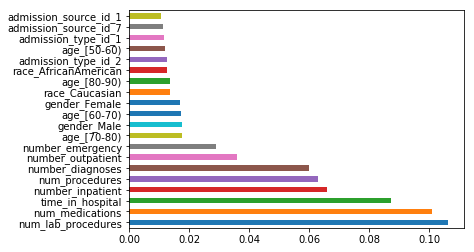

In [50]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Key Observations:¶
* Features and catagories of features giving higher re-admit data seems to be most important features

### Splitting and Scaling the data

In [51]:
# By default split will be 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Machine Learning and Deep Learning Models¶
#### Logistic Regression

In [52]:
log_l1 = LogisticRegression(penalty = 'l1')
log_l1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(log_l1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(log_l1.score(X_test, y_test)))

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on training set: 0.888
Accuracy on test set: 0.885


### Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.888
Accuracy on test set: 0.888


### Neural Networks

In [54]:
model1 = Sequential()
#input leyer
model1.add(Dense(20, input_dim = 145, activation = 'relu'))
#hidden layer
model1.add(Dense(15, activation = 'relu'))
model1.add(Dense(10, activation = 'relu'))
model1.add(Dense(5, activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

# step 2: build the computational graph - compile
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

# step 3: train the model
model1.fit(X_train, y_train, epochs = 20, batch_size = 100)

W0909 18:39:24.716524  4604 deprecation.py:506] From c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0909 18:39:24.809243  4604 deprecation.py:323] From c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
61059/61059 [==============================] - 1s 13us/sample - loss: 0.3639 - acc: 0.8764
Epoch 2/20
61059/61059 [==============================] - 1s 11us/sample - loss: 0.3373 - acc: 0.8885
Epoch 3/20
61059/61059 [==============================] - 1s 11us/sample - loss: 0.3326 - acc: 0.8886
Epoch 4/20
61059/61059 [==============================] - 1s 11us/sample - loss: 0.3311 - acc: 0.8886
Epoch 5/20
61059/61059 [==============================] - 1s 11us/sample - loss: 0.3303 - acc: 0.8887
Epoch 6/20
61059/61059 [==============================] - 1s 11us/sample - loss: 0.3290 - acc: 0.8887
Epoch 7/20
61059/61059 [==============================] - 1s 11us/sample - loss: 0.3286 - acc: 0.8888
Epoch 8/20
61059/61059 [==============================] - 1s 11us/sample - loss: 0.3280 - acc: 0.8888
Epoch 9/20
61059/61059 [==============================] - 1s 11us/sample - loss: 0.3274 - acc: 0.8888
Epoch 10/20
61059/61059 [==============================] - 1s 11us/sample - loss: 

In [55]:
print("Train Accuracy of Deep Neural Network:",model1.evaluate(X_train, y_train))
print("Train Accuracy of Deep Neural Network:",model1.evaluate(X_test, y_test))

61059/61059 [==============================] - 1s 13us/sample - loss: 0.3197 - acc: 0.8906
Train Accuracy of Deep Neural Network: [0.31967540673623474, 0.89059764]
20353/20353 [==============================] - 0s 13us/sample - loss: 0.3540 - acc: 0.8776
Train Accuracy of Deep Neural Network: [0.3540409480782157, 0.87756103]


### Key Observation:
* All Models have same accuracy for Train 88.8 % and test 88.8 %
* We can use any model for quality and predictive performance

### Quality and predictive performance

In [57]:
y_pred_grad = gbrt.predict(X_test)
y_pred_log = log_l1.predict(X_test)

In [58]:
confusion_matrix(y_test, y_pred_log)

array([[17936,   137],
       [ 2200,    80]], dtype=int64)

In [59]:
recall_score(y_test, y_pred_log)

0.03508771929824561

In [60]:
confusion_matrix(y_test, y_pred_grad)

array([[18066,     7],
       [ 2272,     8]], dtype=int64)

In [61]:
recall_score(y_test, y_pred_grad)

0.0035087719298245615

### Key Observation:¶
* Although overall training and test accuracy is good, but we want recall accuracy as we are concerned that if class is actually re-admitted, how often our model predicts it re-admitted. Due to class imbalance, our acuracy of prediction is very low and we have to work on our data to improve our recall predictions.
* We need to look into methods like over sampling of minority class, under sampling of majority class and SMOTE techniques

## SMOTE

In [62]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [63]:
sm = SMOTE(ratio='minority', random_state=42)

In [64]:
Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)

In [65]:
log_l1_smote = LogisticRegression(penalty = 'l1', C = 0.001)
log_l1_smote.fit(Xsm_train, ysm_train)

print("Accuracy on training set: {:.3f}".format(log_l1_smote.score(Xsm_train, ysm_train)))
print("Accuracy on test set: {:.3f}".format(log_l1_smote.score(X_test, y_test)))

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on training set: 0.551
Accuracy on test set: 0.506


In [66]:
y_pred_log_smote = log_l1_smote.predict(X_test)

In [67]:
confusion_matrix(y_test, y_pred_log_smote)

array([[8913, 9160],
       [ 897, 1383]], dtype=int64)

In [68]:
recall_score(y_test, y_pred_log_smote)

0.6065789473684211

In [69]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred_log_smote)

0.2157061530063168

### Key Observation:
* We improved upon the recall score but in the process we generated lots of false positives and that will hurt the business as hospitals will need to check all false positives for their re-admission
* The Good thing is false negatives are reduced and true positives have improved so hospitals could be more sure of overall re-admits

### Caveats
### Key Points:
* We cannot remove the regularization from the model, removing regularization might improve recall score but will overfit the model

### Predicting Probabilities of challengetest_data.csv and writing on excel

In [72]:
ftest.shape

(20352, 145)

In [73]:
pred = log_l1_smote.predict_proba(ftest)

In [74]:
import openpyxl

wb = openpyxl.Workbook()

sheet = wb.active

le_ = len(pred)
p = 0

for i in pred:
     k = 0
     for j in [i]:
          c1 = sheet.cell(row=p+1,column=k+1)
          c1.value = str(j)
          k+=1
     p+=1

wb.save("predictor.xlsx")

### Way Forward from here....¶
### Key Points:
* We need more business knowledge of the data to do more accurate feature selection
* We need to try different models after SMOTE to improve prediction accuracy